This notebook is for explorative analysis of crimes in india.

In [0]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving 01_District_wise_crimes_committed_IPC_2001_2012.csv to 01_District_wise_crimes_committed_IPC_2001_2012.csv
Saving 01_District_wise_crimes_committed_IPC_2013.csv to 01_District_wise_crimes_committed_IPC_2013.csv
Saving 01_District_wise_crimes_committed_IPC_2014.csv to 01_District_wise_crimes_committed_IPC_2014.csv
User uploaded file "01_District_wise_crimes_committed_IPC_2001_2012.csv" with length 1019080 bytes
User uploaded file "01_District_wise_crimes_committed_IPC_2013.csv" with length 95088 bytes
User uploaded file "01_District_wise_crimes_committed_IPC_2014.csv" with length 205809 bytes


In [0]:
file1 = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv',sep=',',header='infer',error_bad_lines=False)
file2 = pd.read_csv('01_District_wise_crimes_committed_IPC_2013.csv',sep=',',header='infer',error_bad_lines=False)
file3 = pd.read_csv('01_District_wise_crimes_committed_IPC_2014.csv',sep=',',header='infer',error_bad_lines=False)


In [5]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
STATE/UT                                               9017 non-null object
DISTRICT                                               9017 non-null object
YEAR                                                   9017 non-null int64
MURDER                                                 9017 non-null int64
ATTEMPT TO MURDER                                      9017 non-null int64
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              9017 non-null int64
RAPE                                                   9017 non-null int64
CUSTODIAL RAPE                                         9017 non-null int64
OTHER RAPE                                             9017 non-null int64
KIDNAPPING & ABDUCTION                                 9017 non-null int64
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            9017 non-null int64
KIDNAPPING AND ABDUCTION OF OTHERS                     9017 non-nu

In [6]:
file1.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [0]:
alldata = pd.concat([file1,file2,file3])

In [0]:
exp1 = alldata.groupby(['YEAR','STATE/UT'],as_index=False)['MURDER'].sum()

In [9]:
exp1_1=exp1.groupby(['YEAR'],as_index=False)['MURDER'].max()
exp1_1merged = pd.merge(exp1_1,exp1,on=['YEAR','MURDER'])
exp1_1merged.head(20)

,YEAR,MURDER,STATE/UT
0,2001.0,15202.0,UTTAR PRADESH
1,2002.0,13650.0,UTTAR PRADESH
2,2003.0,10568.0,UTTAR PRADESH
3,2004.0,12252.0,UTTAR PRADESH
4,2005.0,11422.0,UTTAR PRADESH
5,2006.0,10960.0,UTTAR PRADESH
6,2007.0,10000.0,UTTAR PRADESH
7,2008.0,9128.0,UTTAR PRADESH
8,2009.0,9068.0,UTTAR PRADESH
9,2010.0,8802.0,UTTAR PRADESH


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


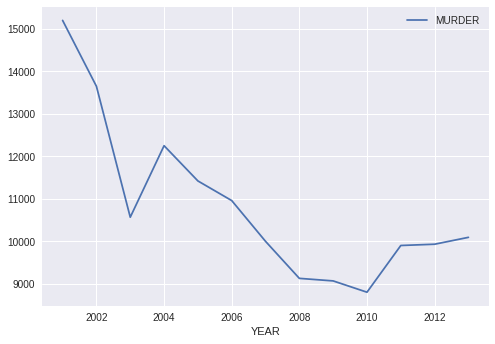

In [10]:
exp1_1merged.plot(x=['YEAR'],y=['MURDER'])

In [11]:
exp2 = alldata.groupby(['YEAR','DISTRICT'],as_index=False)['MURDER'].sum()
exp2=exp2[exp2.DISTRICT != 'TOTAL']
exp2=exp2[exp2.DISTRICT != 'ZZ TOTAL']
exp2_1=exp2.groupby(['YEAR'],as_index=False)['MURDER'].max()
exp2_1merged = pd.merge(exp2_1,exp2,on=['YEAR','MURDER'])
exp2_1merged.head(20)

,YEAR,MURDER,DISTRICT
0,2001.0,547.0,DELHI UT TOTAL
1,2002.0,531.0,DELHI UT TOTAL
2,2003.0,485.0,DELHI UT TOTAL
3,2004.0,542.0,PATNA
4,2005.0,455.0,DELHI UT TOTAL
5,2006.0,476.0,DELHI UT TOTAL
6,2007.0,495.0,DELHI UT TOTAL
7,2008.0,554.0,DELHI UT TOTAL
8,2009.0,552.0,DELHI UT TOTAL
9,2010.0,565.0,DELHI UT TOTAL


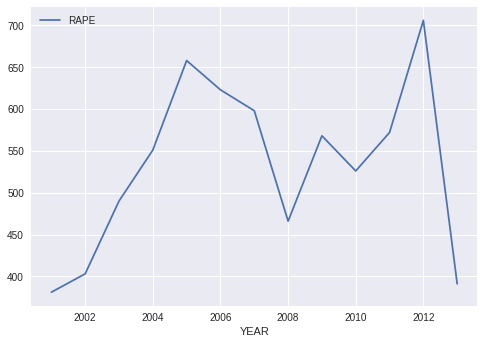

In [12]:
exp3 = alldata.groupby(['YEAR','DISTRICT'],as_index=False)['RAPE'].sum()
exp3=exp3[exp3.DISTRICT != 'TOTAL']
exp3=exp3[exp3.DISTRICT != 'ZZ TOTAL']
exp3_1=exp3.groupby(['YEAR'],as_index=False)['RAPE'].max()
exp3_1merged = pd.merge(exp3_1,exp3,on=['YEAR','RAPE'])
exp3_1merged.head(20)
exp3_1merged.plot(y='RAPE',x='YEAR')

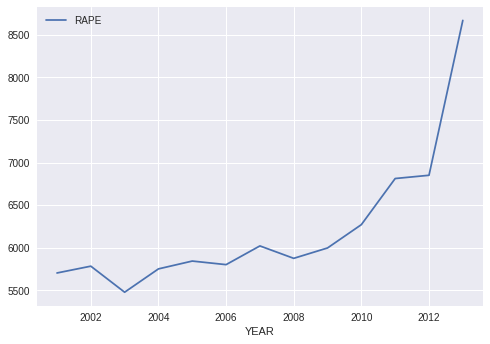

In [13]:
exp4 = alldata.groupby(['YEAR','STATE/UT'],as_index=False)['RAPE'].sum()
exp4_1=exp4.groupby(['YEAR'],as_index=False)['RAPE'].max()
exp4_1merged = pd.merge(exp4_1,exp4,on=['YEAR','RAPE'])
exp4_1merged.plot(y='RAPE',x='YEAR')

In [14]:
exp4_1merged.head(20)

,YEAR,RAPE,STATE/UT
0,2001.0,5702.0,MADHYA PRADESH
1,2002.0,5782.0,MADHYA PRADESH
2,2003.0,5476.0,MADHYA PRADESH
3,2004.0,5750.0,MADHYA PRADESH
4,2005.0,5842.0,MADHYA PRADESH
5,2006.0,5800.0,MADHYA PRADESH
6,2007.0,6020.0,MADHYA PRADESH
7,2008.0,5874.0,MADHYA PRADESH
8,2009.0,5996.0,MADHYA PRADESH
9,2010.0,6270.0,MADHYA PRADESH


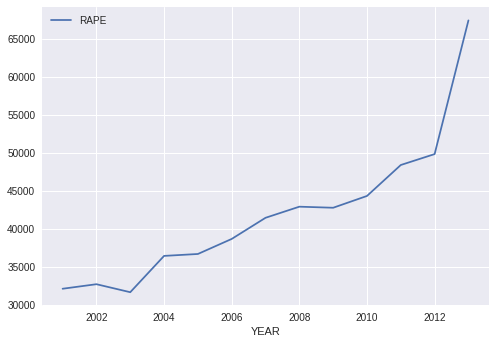

In [27]:
exp5=alldata
exp5 = alldata.groupby(['YEAR'],as_index=False)['RAPE'].sum()
exp5.plot(y='RAPE',x='YEAR')

In [29]:
exp6=alldata
exp6 = alldata.groupby(['YEAR','STATE/UT'],as_index=False)['KIDNAPPING & ABDUCTION'].sum()
exp6_1=exp6.groupby(['YEAR'],as_index=False)['KIDNAPPING & ABDUCTION'].max()
exp6_1merged = pd.merge(exp6_1,exp6,on=['YEAR','KIDNAPPING & ABDUCTION'])
exp6_1merged.head(20)

,YEAR,KIDNAPPING & ABDUCTION,STATE/UT
0,2001.0,8660.0,UTTAR PRADESH
1,2002.0,6860.0,UTTAR PRADESH
2,2003.0,4854.0,BIHAR
3,2004.0,6826.0,BIHAR
4,2005.0,5910.0,UTTAR PRADESH
5,2006.0,6636.0,UTTAR PRADESH
6,2007.0,8956.0,UTTAR PRADESH
7,2008.0,10856.0,UTTAR PRADESH
8,2009.0,12166.0,UTTAR PRADESH
9,2010.0,12642.0,UTTAR PRADESH


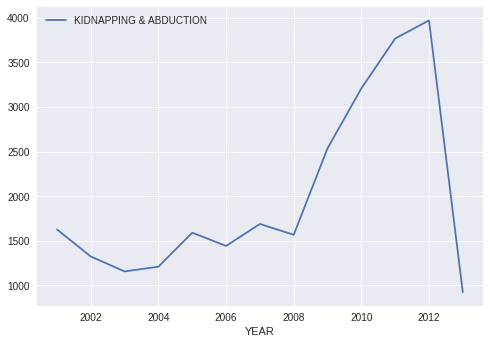

In [17]:
exp7 = alldata.groupby(['YEAR','DISTRICT'],as_index=False)['KIDNAPPING & ABDUCTION'].sum()
exp7=exp7[exp7.DISTRICT != 'TOTAL']
exp7=exp7[exp7.DISTRICT != 'ZZ TOTAL']
exp7_1=exp7.groupby(['YEAR'],as_index=False)['KIDNAPPING & ABDUCTION'].max()
exp7_1merged = pd.merge(exp7_1,exp7,on=['YEAR','KIDNAPPING & ABDUCTION'])
exp7_1merged.plot(y='KIDNAPPING & ABDUCTION',x='YEAR')

In [0]:
exp=alldata

In [0]:
exp['STATE']=alldata['STATE/UT']

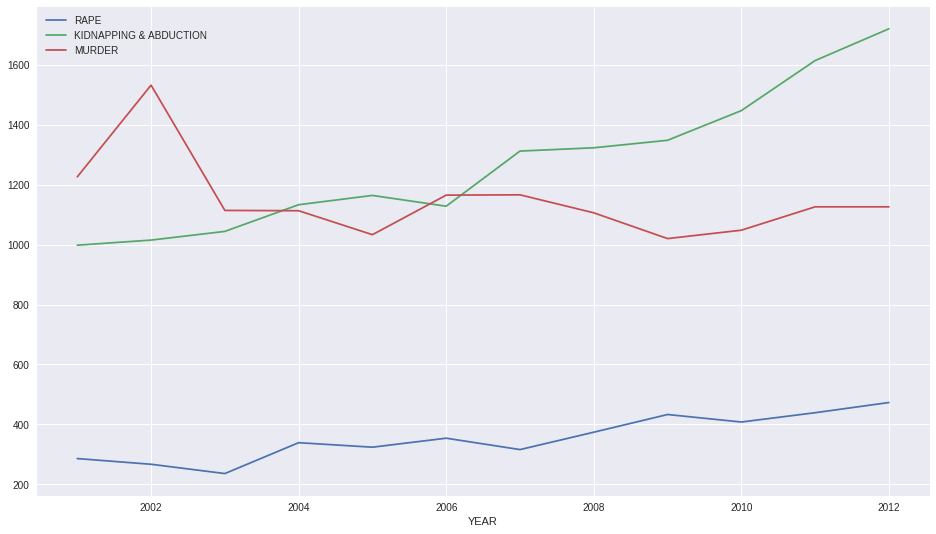

In [21]:
temp = exp[exp.STATE == 'GUJARAT']
temp = temp[temp.DISTRICT != 'TOTAL']
plotable = temp[['YEAR','DISTRICT','RAPE','KIDNAPPING & ABDUCTION','MURDER']]
p = plotable.groupby('YEAR',as_index=False)['RAPE','KIDNAPPING & ABDUCTION','MURDER'].sum()
p.plot(x='YEAR',figsize=(16,9))

In [52]:
trend=alldata
trend['STATE']=alldata['STATE/UT']
graph = trend[['YEAR','STATE','RAPE','KIDNAPPING & ABDUCTION','MURDER']]
trend['allcrimes'] = trend['RAPE']+trend['KIDNAPPING & ABDUCTION']+trend['MURDER']
p = trend.groupby(['YEAR','STATE'],as_index=False)['allcrimes'].sum()
p.head()

,YEAR,STATE,allcrimes
0,2001.0,A & N ISLANDS,36.0
1,2001.0,ANDHRA PRADESH,9310.0
2,2001.0,ARUNACHAL PRADESH,398.0
3,2001.0,ASSAM,7306.0
4,2001.0,BIHAR,13380.0


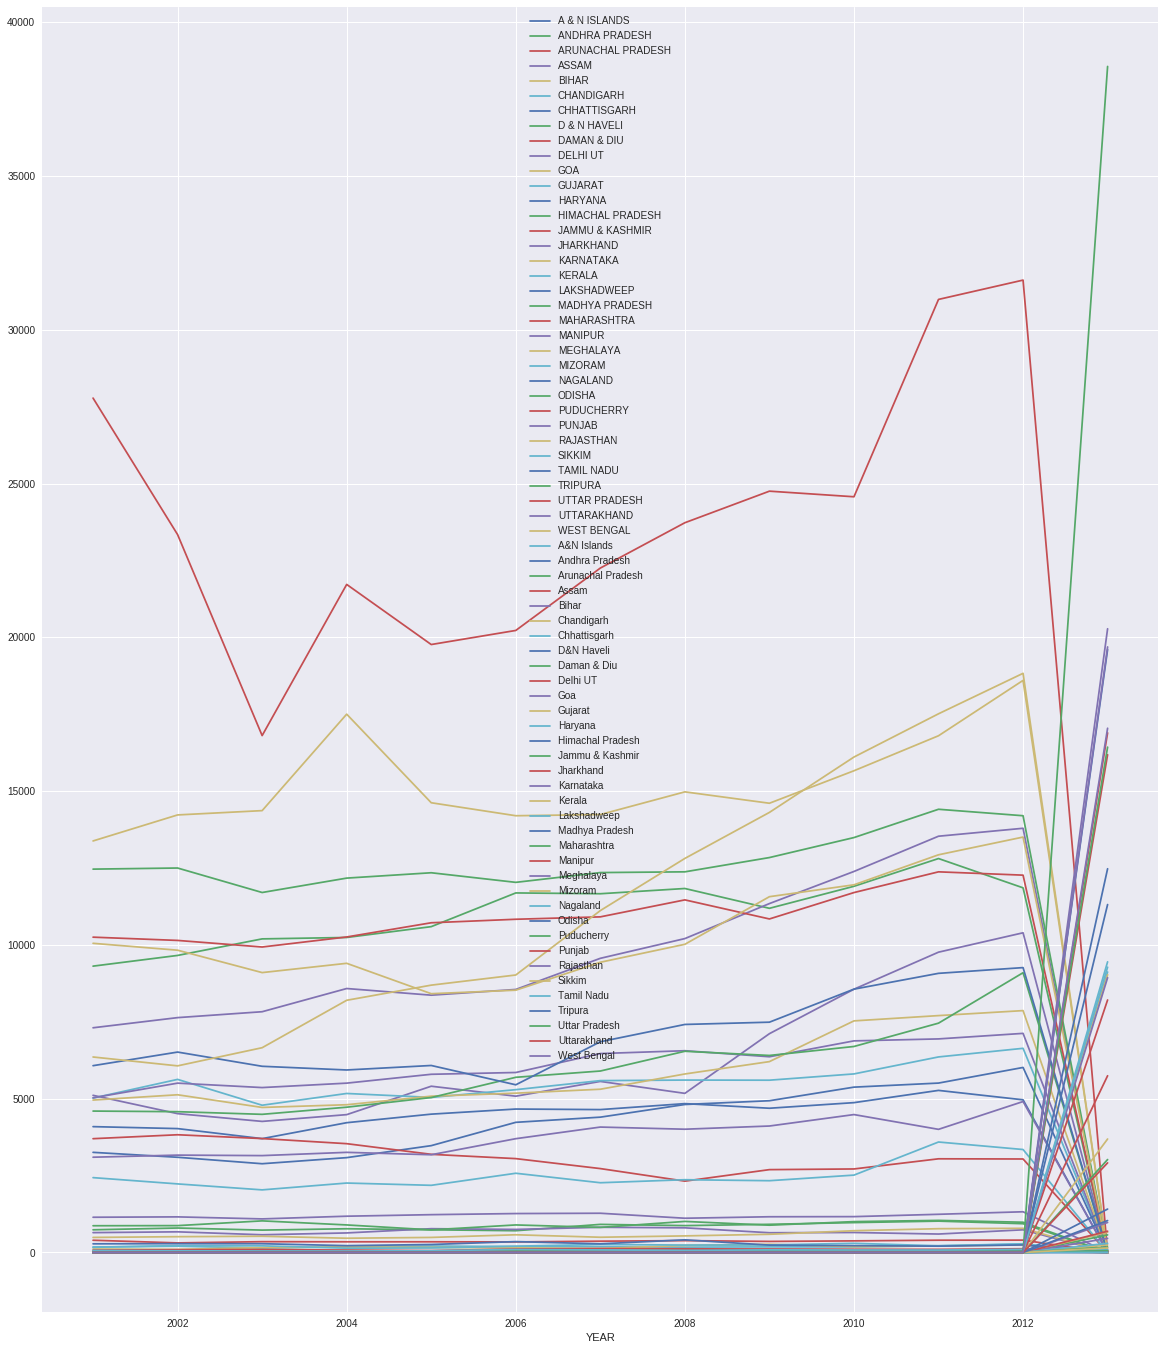

In [98]:

x=pd.DataFrame()
x['YEAR'] = 0
for index, row in p.iterrows():
  f=str(row['STATE'])
  x=x.append({'YEAR':row['YEAR'],f:row['allcrimes']},ignore_index = True)
x=x.fillna(0)
y = x.groupby('YEAR',as_index=False).sum()
y.plot(x='YEAR', figsize=(20,24))
  
  